<a href="https://colab.research.google.com/github/ausaffatima/airline-sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Airlines Sentiment Analysis

Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud 
import re
import string
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Setting the style.



In [2]:
sns.set_style('dark')
plt.style.use('seaborn-deep')

Reading the data from the csv file and taking a look at it.

In [3]:
df = pd.read_csv('Tweets.csv')

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Dropping the airline_sentiment_gold, negativereason_gold and tweet_coord columns because they contain mostly null values.

In [6]:
df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace=True)

Distribution of the sentiment.

Text(0.5, 1.0, 'Sentiment Distribution')

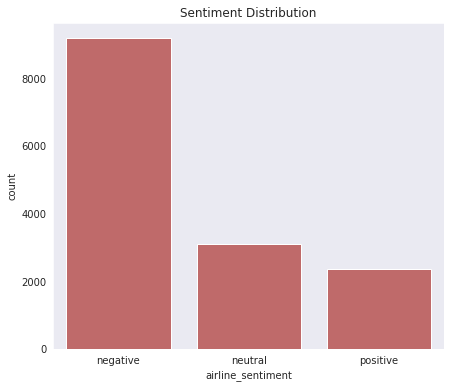

In [7]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['airline_sentiment'].sort_values(), color='indianred')
plt.title('Sentiment Distribution')

Most reviews are negative.

Airline-wise Analysis:

In [8]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Distribution of each airline.

Text(0.5, 1.0, 'Sentiment Distribution')

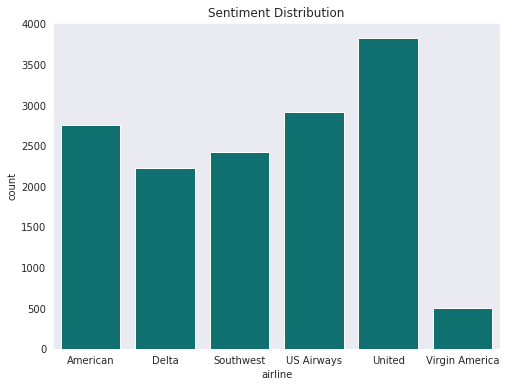

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['airline'].sort_values(), color='teal')
plt.title('Sentiment Distribution')

Most reviews are about the united airways whereas the least are of virgin america.

Forming airline-wise datasets.

In [10]:
virgin_america = df[df['airline'] == 'Virgin America']
united = df[df['airline'] == 'United']
southwest = df[df['airline'] == 'Southwest']
delta = df[df['airline'] == 'Delta']
us_airways = df[df['airline'] == 'US Airways']
american = df[df['airline'] == 'American']

Sentiment-wise distribution of each airline.

Text(0.5, 1.0, 'Sentiment Distribution of American')

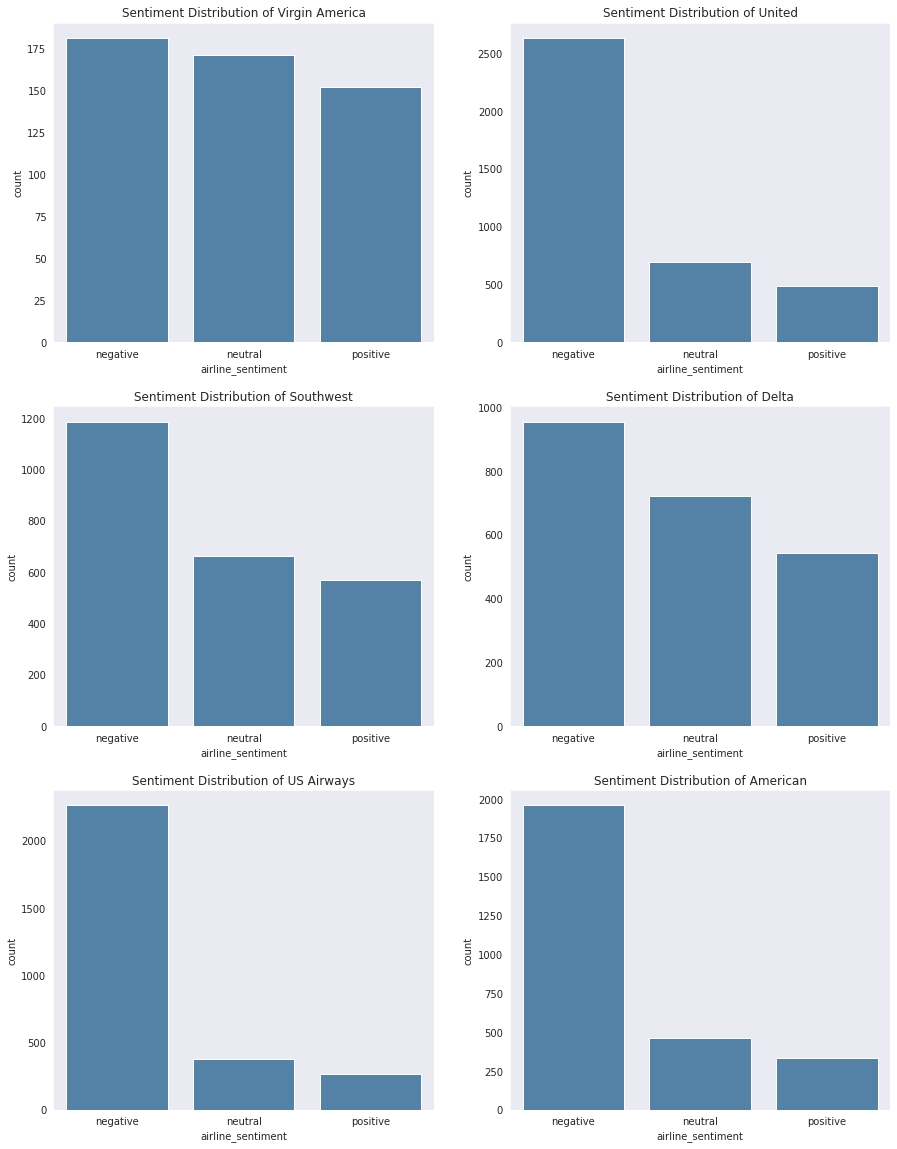

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(15,20))

sns.countplot(x=virgin_america['airline_sentiment'].sort_values(), ax=ax[0][0], color='steelblue')
ax[0][0].set_title('Sentiment Distribution of Virgin America')

sns.countplot(x=united['airline_sentiment'].sort_values(), ax=ax[0][1], color='steelblue')
ax[0][1].set_title('Sentiment Distribution of United')

sns.countplot(x=southwest['airline_sentiment'].sort_values(), ax=ax[1][0], color='steelblue')
ax[1][0].set_title('Sentiment Distribution of Southwest')

sns.countplot(x=delta['airline_sentiment'].sort_values(), ax=ax[1][1], color='steelblue')
ax[1][1].set_title('Sentiment Distribution of Delta')

sns.countplot(x=us_airways['airline_sentiment'].sort_values(), ax=ax[2][0], color='steelblue')
ax[2][0].set_title('Sentiment Distribution of US Airways')

sns.countplot(x=american['airline_sentiment'], ax=ax[2][1], color='steelblue')
ax[2][1].set_title('Sentiment Distribution of American')

Virgin America has the most even distribution whereas US Airways has most of their reviews as negative.

Exploring the top reasons given for negative review.

Text(0.5, 1.0, 'Top Negative Reasons')

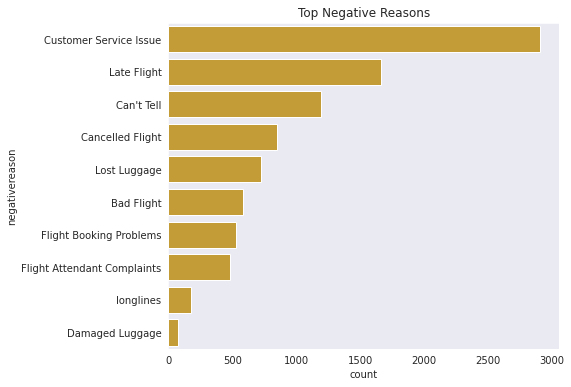

In [12]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['negativereason'].sort_values(), order=df['negativereason'].value_counts().nlargest(10).index,
              color='goldenrod')
plt.title('Top Negative Reasons')

Exploring the top tweet locations.



Text(0.5, 1.0, 'Top Tweet Locations')

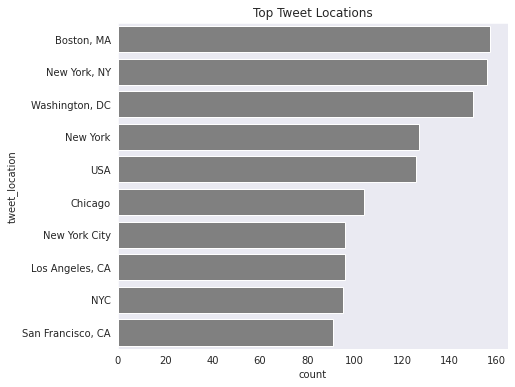

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['tweet_location'].sort_values(), order=df['tweet_location'].value_counts().nlargest(10).index,
              color='gray')
plt.title('Top Tweet Locations')

Exploring the top user timezones

Text(0.5, 1.0, 'Top User Timezones')

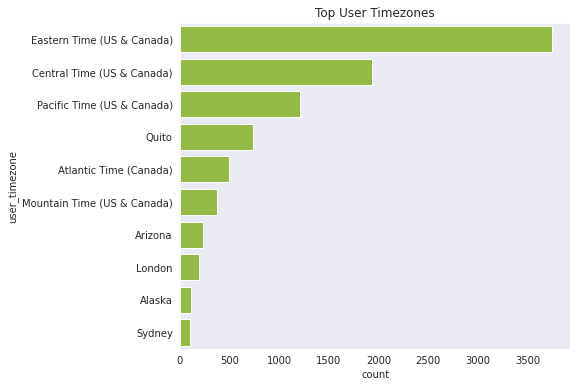

In [14]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['user_timezone'].sort_values(), order=df['user_timezone'].value_counts().nlargest(10).index,
              color='yellowgreen')
plt.title('Top User Timezones')

WordCloud of the most common words in the reviews.

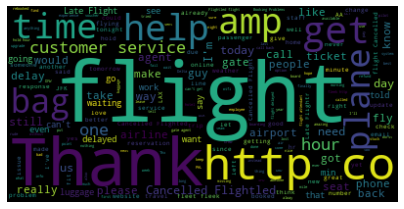

In [15]:
stop_words = set(stopwords.words("english"))
stop_words.update(["United", "VirginAmerica", "AmericanAir", "USAirways",
                   "SouthwestAir", "JetBlue"])
textt = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.figure(figsize=(7,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

WordClouds for positive and negative reviews.

In [16]:
positive = df[df['airline_sentiment'] == 'positive']
negative = df[df['airline_sentiment'] == 'negative']
neutral = df[df['airline_sentiment'] == 'neutral']

(-0.5, 399.5, 199.5, -0.5)

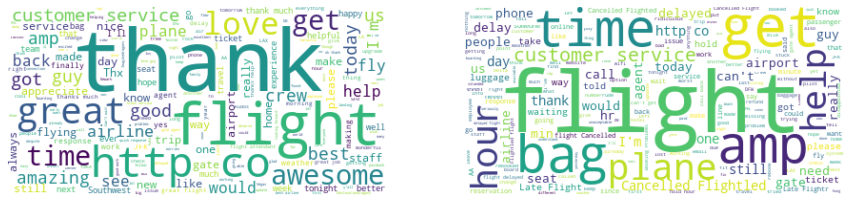

In [17]:
stop_words = set(stopwords.words("english"))
stop_words.update(["br", "href", "united", "VirginAmerica", "AmericanAir", "USAirways",
                   "SouthwestAir", "JetBlue"]) 

textt = " ".join(review for review in positive.text)
wordcloud = WordCloud(background_color='white', stopwords=stop_words).generate(textt)

fig, ax = plt.subplots(1, 2, figsize=(15,12))

ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")

textt = " ".join(review for review in negative.text)
wordcloud = WordCloud(background_color='white', stopwords=stop_words).generate(textt)

ax[1].imshow(wordcloud, interpolation='bilinear')
ax[1].axis("off")

### Sentiment Analysis using Machine Learning

Dropping all columns except the review and sentiment as only those are required to train the model.

In [18]:
df.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence',
         'airline', 'name', 'retweet_count', 'tweet_created', 'tweet_location', 'user_timezone'], 
         axis=1, inplace=True)

Cleaning the text.

In [19]:
def clean(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]'% re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w', '', text)
  text = re.sub('\n', '', text)
  return text

cleaned = lambda x:clean(x)

df['text'] = pd.DataFrame(df.text.apply(cleaned))
df.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus youve added commercials to ...
2,neutral,virginamerica i didnt today must mean i need t...
3,negative,virginamerica its really aggressive to blast o...
4,negative,virginamerica and its a really big bad thing a...


Encoding the sentiments into numeric values.

In [20]:
le = preprocessing.LabelEncoder()
df['airline_sentiment'] = le.fit_transform(df['airline_sentiment'])
df.head()

,airline_sentiment,text
0,1,virginamerica what dhepburn said
1,2,virginamerica plus youve added commercials to ...
2,1,virginamerica i didnt today must mean i need t...
3,0,virginamerica its really aggressive to blast o...
4,0,virginamerica and its a really big bad thing a...


Setting the X and y variables.

In [21]:
X = df['text']
y = df['airline_sentiment']

Splitting into train and test sets.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Initializing the TfIdf Vectorizer, which is used to extract the textual features.

In [23]:
tvec = TfidfVectorizer()

Logistic Regression.

In [24]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

model = Pipeline([('vectorizer', tvec), ('classifier', lr)])

model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=1000))])

Testing the accuracy.

In [25]:
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

0.8044171220400729

Support Vector Machine.

In [26]:
ksvc = SVC(kernel='rbf', random_state=0)

model = Pipeline([('vectorizer', tvec), ('classifier', ksvc)])

model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', SVC(random_state=0))])

Testing the accuracy.

In [27]:
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

0.8021402550091075

LSTM Deep Learning Model.

Extracting the textual features using Tokenizer.

In [28]:
tokenizer = Tokenizer(num_words=2000, split=' ') 
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)
y = df['airline_sentiment']

Splitting into train, validation and test sets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_valid, X_final, y_valid, y_final = train_test_split(X_test, y_test, test_size = 0.5)

Defining the LSTM Model.

In [30]:
model = Sequential()
model.add(Embedding(500, 32, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 32)            16000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 33, 32)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               147136    
                                                                 
 dense (Dense)               (None, 3)                 531       
                                                                 
Total params: 163,667
Trainable params: 163,667
Non-trainable params: 0
_________________________________________________________________
None


Training the model.

In [32]:
model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), batch_size=64, verbose = 'auto')

Epoch 1/10
161/161 [==============================] - 43s 267ms/step - loss: 0.5216 - accuracy: 0.7926 - val_loss: 0.5240 - val_accuracy: 0.7864
Epoch 2/10
161/161 [==============================] - 43s 268ms/step - loss: 0.5132 - accuracy: 0.7964 - val_loss: 0.5237 - val_accuracy: 0.7923
Epoch 3/10
161/161 [==============================] - 43s 268ms/step - loss: 0.5092 - accuracy: 0.7964 - val_loss: 0.5322 - val_accuracy: 0.7851
Epoch 4/10
161/161 [==============================] - 44s 273ms/step - loss: 0.5038 - accuracy: 0.7987 - val_loss: 0.5284 - val_accuracy: 0.7933
Epoch 5/10
161/161 [==============================] - 44s 274ms/step - loss: 0.4968 - accuracy: 0.8011 - val_loss: 0.5421 - val_accuracy: 0.7782
Epoch 6/10
161/161 [==============================] - 44s 271ms/step - loss: 0.4992 - accuracy: 0.7991 - val_loss: 0.5302 - val_accuracy: 0.7923
Epoch 7/10
161/161 [==============================] - 44s 271ms/step - loss: 0.4919 - accuracy: 0.8029 - val_loss: 0.5399 - val_ac